# Second Exam

## Exercise 1: Optimization

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def gradient_descent(inicial_value, f, df, learning_rate, num_iterations):
    x = inicial_value
    history = []

    for i in range(num_iterations):
        gradient = df(x)
        x = x - learning_rate * gradient
        history.append(x)

    return x, history

In [18]:
def f(x):
    return x**2 + 4*x + 5

def df(x):
    return 2*x + 4

initial_value = 1
learning_rate = 0.01
num_iterations = 20

min_x, x_history = gradient_descent(initial_value, f, df, learning_rate, num_iterations)

print(f"Minimum value of x found: {min_x}")
print(f"Minimum value of f(x): {f(min_x)}")

Minimum value of x found: 0.002823915265283472
Minimum value of f(x): 5.011303635558559


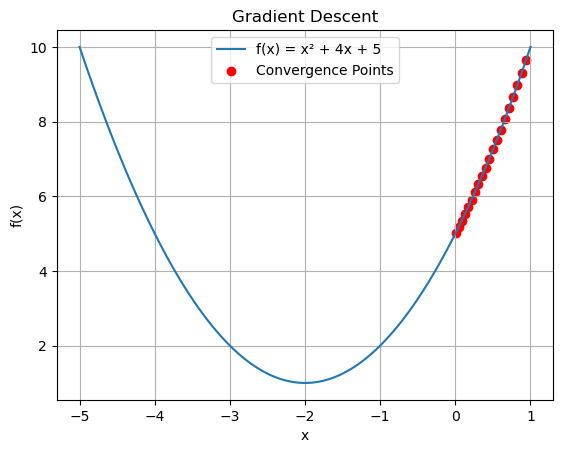

In [19]:
x_values = np.linspace(-5, 1, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label="f(x) = x² + 4x + 5")
plt.scatter(x_history, [f(x) for x in x_history], color='red', label="Convergence Points")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent")
plt.legend()
plt.grid()
plt.show()

## Exercise 2: Knowledge Based System

In [20]:
class KnowledgeBasedSystem:
    def __init__(self):
        self.facts = {}
        self.rules = []

    def add_fact(self, fact, value):
        self.facts[fact] = value

    def add_rule(self, condition, result):
        self.rules.append((condition, result))

    def reset_rules(self):
        self.rules = []

    def evaluate(self):
        for condition, result in self.rules:
            if all(self.facts.get(fact) == value for fact, value in condition.items()):
                return result
        return "Innocent"

### Case 1:  The Mansion Murder 

In [21]:
system = KnowledgeBasedSystem()

system.add_fact('seen_near_crime_scene', True)
system.add_fact('knife_with_fingerprints', True)
system.add_fact('had_debt_with_victim', True)

system.add_rule({'seen_near_crime_scene': True, 'knife_with_fingerprints': True, 'had_debt_with_victim': True}, 'Guilty')

initial_verdict = system.evaluate()
print(f"Initial Verdict: {initial_verdict}")

system.add_fact('security_video_alibi', True)
system.add_fact('fingerprints_do_not_match', True)

system.reset_rules()
system.add_rule({'security_video_alibi': True, 'fingerprints_do_not_match': True}, 'Innocent')

final_verdict = system.evaluate()
print(f"Final Verdict: {final_verdict}")

Initial Verdict: Guilty
Final Verdict: Innocent


### Case 2: The Bank Heist

In [22]:
system = KnowledgeBasedSystem()

system.add_fact('recently_fired', True)
system.add_fact('access_to_blueprints', True)
system.add_fact('seen_near_bank', True)
system.add_fact('stolen_money_found', True)

system.add_rule({'recently_fired': True, 'access_to_blueprints': True, 'seen_near_bank': True, 'stolen_money_found': True}, 'Guilty')

initial_verdict = system.evaluate()
print(f"Initial Verdict: {initial_verdict}")

system.add_fact('witness_mistaken', True)
system.add_fact('money_from_inheritance', True)

system.reset_rules()
system.add_rule({'witness_mistaken': True, 'money_from_inheritance': True}, 'Innocent')

final_verdict = system.evaluate()
print(f"Final Verdict: {final_verdict}")

Initial Verdict: Guilty
Final Verdict: Innocent


### Case 3: The Trafic Accident

In [23]:
system = KnowledgeBasedSystem()

system.add_fact('speeding', True)
system.add_fact('ran_red_light', True)
system.add_fact('alcohol_in_blood', True)

system.add_rule({'speeding': True, 'ran_red_light': True, 'alcohol_in_blood': True}, 'Guilty')

initial_verdict = system.evaluate()
print(f"Initial Verdict: {initial_verdict}")

system.add_fact('traffic_light_green', True)
system.add_fact('alcohol_within_limit', True)

system.reset_rules()
system.add_rule({'traffic_light_green': True, 'alcohol_within_limit': True}, 'Innocent')

final_verdict = system.evaluate()
print(f"Final Verdict: {final_verdict}")

Initial Verdict: Guilty
Final Verdict: Innocent


## Exercise 3: Emotion Detection in Text

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
messages = [
    ("I had an amazing day today! Everything went perfectly.", "positive"),
    ("I’m so grateful for all the love and support I’ve been receiving.", "positive"),
    ("This is the best news I’ve heard in a long time!", "positive"),
    ("I’m thrilled with the results of the project. Great job, team!", "positive"),
    ("I feel so happy and content right now. Life is good.", "positive"),
    ("I’m feeling really down today. Nothing seems to be going right.", "negative"),
    ("This has been the worst day of my life. I can’t believe this happened.", "negative"),
    ("I’m so frustrated with everything right now. I just want to give up.", "negative"),
    ("I’m really upset about the way things turned out. It’s so disappointing.", "negative"),
    ("I’m feeling so lonely and isolated. I wish I had someone to talk to.", "negative"),
    ("I’m just going about my day as usual. Nothing special to report.", "neutral"),
    ("The meeting was okay. Nothing too exciting happened.", "neutral"),
    ("I’m just waiting for the weekend to come. It’s been a regular week.", "neutral"),
    ("I’m not sure how I feel about it. I need more time to think.", "neutral"),
    ("The weather is neither good nor bad today. It’s just average.", "neutral")
]

In [27]:
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char == ' '])
    return text

In [28]:
df = pd.DataFrame(messages, columns=["text", "emotion"])

df["text_clean"] = df["text"].apply(preprocess)

In [29]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text_clean"])
freq_table = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
freq_table["emotion"] = df["emotion"]
freq_table.head()

,about,all,amazing,an,and,as,average,bad,be,been,...,was,way,weather,week,weekend,went,wish,with,worst,emotion
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,positive
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,positive
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [30]:
prior_probabilities = df["emotion"].value_counts(normalize=True)
prior_probabilities

emotion
positive    0.333333
negative    0.333333
neutral     0.333333
Name: proportion, dtype: float64

In [31]:
conditional_probabilities = freq_table.groupby("emotion").sum() / freq_table.groupby("emotion").sum().sum(axis=1).values[:, np.newaxis]
conditional_probabilities

,about,all,amazing,an,and,as,average,bad,be,been,...,want,was,way,weather,week,weekend,went,wish,with,worst
emotion,,,,,,,,,,,,,,,,,,,,,
negative,0.016667,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.016667,0.016667,...,0.016667,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.016667,0.016667,0.016667
neutral,0.036364,0.000000,0.000000,0.000000,0.000000,0.018182,0.018182,0.018182,0.000000,0.018182,...,0.000000,0.018182,0.000000,0.018182,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000
positive,0.000000,0.019608,0.019608,0.019608,0.039216,0.000000,0.000000,0.000000,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.019608,0.000000


In [32]:
def calculate_posterior_probability(text):
    words = preprocess(text).split()
    posterior_probabilities = {}

    for emotion in prior_probabilities.index:
        prob = prior_probabilities[emotion]
        for word in words:
            if word in conditional_probabilities.columns:
                prob *= conditional_probabilities.loc[emotion, word]
        posterior_probabilities[emotion] = prob

    total = sum(posterior_probabilities.values())
    posterior_probabilities = {k: v / total for k, v in posterior_probabilities.items()}

    return posterior_probabilities

In [33]:
text_to_classify = "I feel so happy and content right now."
posterior_probs = calculate_posterior_probability(text_to_classify)
print("Probabilidades Posteriores:")
for emotion, prob in posterior_probs.items():
    print(f"{emotion}: {prob:.4f}")

Probabilidades Posteriores:
positive: 1.0000
negative: 0.0000
neutral: 0.0000


## Exercise 4: Fuzzy Logic for Smart Home Lighting Control 

In [34]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [36]:
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')
occupancy = ctrl.Antecedent(np.arange(0, 2, 1), 'occupancy')

light_intensity = ctrl.Consequent(np.arange(0, 101, 1), 'light_intensity')

time_of_day['Morning'] = fuzz.trimf(time_of_day.universe, [6, 6, 12])
time_of_day['Afternoon'] = fuzz.trimf(time_of_day.universe, [12, 12, 18])
time_of_day['Evening'] = fuzz.trimf(time_of_day.universe, [18, 18, 21])
time_of_day['Night'] = fuzz.trimf(time_of_day.universe, [21, 24, 24])

occupancy['Unoccupied'] = fuzz.trimf(occupancy.universe, [0, 0, 1])
occupancy['Occupied'] = fuzz.trimf(occupancy.universe, [0, 1, 1])

light_intensity['Off'] = fuzz.trimf(light_intensity.universe, [0, 0, 0])
light_intensity['Low'] = fuzz.trimf(light_intensity.universe, [0, 25, 50])
light_intensity['Medium'] = fuzz.trimf(light_intensity.universe, [25, 50, 75])
light_intensity['High'] = fuzz.trimf(light_intensity.universe, [50, 100, 100])

rule1 = ctrl.Rule(time_of_day['Morning'] & occupancy['Occupied'], light_intensity['Medium'])
rule2 = ctrl.Rule(time_of_day['Afternoon'] & occupancy['Occupied'], light_intensity['Low'])
rule3 = ctrl.Rule(time_of_day['Evening'] & occupancy['Occupied'], light_intensity['High'])
rule4 = ctrl.Rule(time_of_day['Night'] & occupancy['Unoccupied'], light_intensity['Off'])

lighting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
lighting_system = ctrl.ControlSystemSimulation(lighting_ctrl)

def adjust_lighting(time, occupancy_status):
    lighting_system.input['time_of_day'] = time
    lighting_system.input['occupancy'] = occupancy_status
    lighting_system.compute()
    print(lighting_system.output.keys())
    return lighting_system.output['light_intensity']

time = 7
occupancy_status = 1
intensity = adjust_lighting(time, occupancy_status)
print(f"Intensidad de la luz a las {time}: {intensity:.2f}%")

time = 13
occupancy_status = 0
intensity = adjust_lighting(time, occupancy_status)
print(f"Intensidad de la luz a las {time}: {intensity:.2f}%")

time = 19
occupancy_status = 1
intensity = adjust_lighting(time, occupancy_status)
print(f"Intensidad de la luz a las {time}: {intensity:.2f}%")

time = 23
occupancy_status = 0
intensity = adjust_lighting(time, occupancy_status)
print(f"Intensidad de la luz a las {time}: {intensity:.2f}%")


dict_keys(['light_intensity'])
Intensidad de la luz a las 7: 50.00%
dict_keys([])


KeyError: 'light_intensity'

No logré identificar el error, me podría indicar cual es de favor